In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 70)
print("Softmax vs LayerNorm - Understanding the Difference")
print("=" * 70) 



Softmax vs LayerNorm - Understanding the Difference


# Softmax vs LayerNorm: Key Differences

## Overview:

**Softmax:**
- Normalizes across a dimension (usually the last dimension)
- Converts values to probabilities (sums to 1)
- Used in: Classification outputs, attention weights
- Formula: `softmax(x_i) = exp(x_i) / Σexp(x_j)`

**LayerNorm:**
- Normalizes across features for each sample independently
- Standardizes mean=0, std=1 per sample
- Used in: Normalizing activations in neural networks
- Formula: `LayerNorm(x) = γ * (x - μ) / √(σ² + ε) + β`

In [2]:
# ============================================================================
# Example 1: Basic Understanding - What Each Does
# ============================================================================

print("=" * 70)
print("Example 1: Basic Understanding")
print("=" * 70)

# Create sample input data
# Shape: (batch_size=2, seq_len=3, features=4)
x = torch.tensor([
    [[1.0, 2.0, 3.0, 4.0],
     [2.0, 3.0, 4.0, 5.0],
     [1.0, 1.0, 1.0, 1.0]],
    
    [[5.0, 6.0, 7.0, 8.0],
     [1.0, 2.0, 3.0, 4.0],
     [0.0, 0.0, 0.0, 0.0]]
], dtype=torch.float32)

print(f"Input shape: {x.shape}")
print(f"Input:\n{x}\n")

# Apply Softmax (normalizes across last dimension)
softmax_output = F.softmax(x, dim=-1)
print("=" * 70)
print("SOFTMAX Output (normalized across features, each row sums to 1):")
print("=" * 70)
print(softmax_output)
print(f"\nRow sums (should be ~1.0):")
print(softmax_output.sum(dim=-1))

# Apply LayerNorm (normalizes across features for each sample)
layer_norm = nn.LayerNorm(x.shape[-1])  # Normalize across last dimension
layernorm_output = layer_norm(x)
print("\n" + "=" * 70)
print("LAYERNORM Output (mean≈0, std≈1 for each sample):")
print("=" * 70)
print(layernorm_output)
print(f"\nMean per sample (should be ~0.0):")
print(layernorm_output.mean(dim=-1))
print(f"\nStd per sample (should be ~1.0):")
print(layernorm_output.std(dim=-1))

Example 1: Basic Understanding
Input shape: torch.Size([2, 3, 4])
Input:
tensor([[[1., 2., 3., 4.],
         [2., 3., 4., 5.],
         [1., 1., 1., 1.]],

        [[5., 6., 7., 8.],
         [1., 2., 3., 4.],
         [0., 0., 0., 0.]]])

SOFTMAX Output (normalized across features, each row sums to 1):
tensor([[[0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.2500, 0.2500, 0.2500, 0.2500]],

        [[0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.2500, 0.2500, 0.2500, 0.2500]]])

Row sums (should be ~1.0):
tensor([[1., 1., 1.],
        [1., 1., 1.]])

LAYERNORM Output (mean≈0, std≈1 for each sample):
tensor([[[-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416],
         [ 0.0000,  0.0000,  0.0000,  0.0000]],

        [[-1.3416, -0.4472,  0.4472,  1.3416],
         [-1.3416, -0.4472,  0.4472,  1.3416],
         [ 0.0000,  0.0000,  0.0000,  0.0000]]],
       grad_fn=<NativeL

Example 2: Visual Comparison (1D Vector)
Original vector: tensor([1., 2., 3., 4., 5.])
Softmax: tensor([0.0117, 0.0317, 0.0861, 0.2341, 0.6364])
Softmax sum: 1.0000 (should be 1.0)
LayerNorm: tensor([-1.4142, -0.7071,  0.0000,  0.7071,  1.4142],
       grad_fn=<NativeLayerNormBackward0>)
LayerNorm mean: 0.0000 (should be ~0.0)
LayerNorm std: 1.1180 (should be ~1.0)


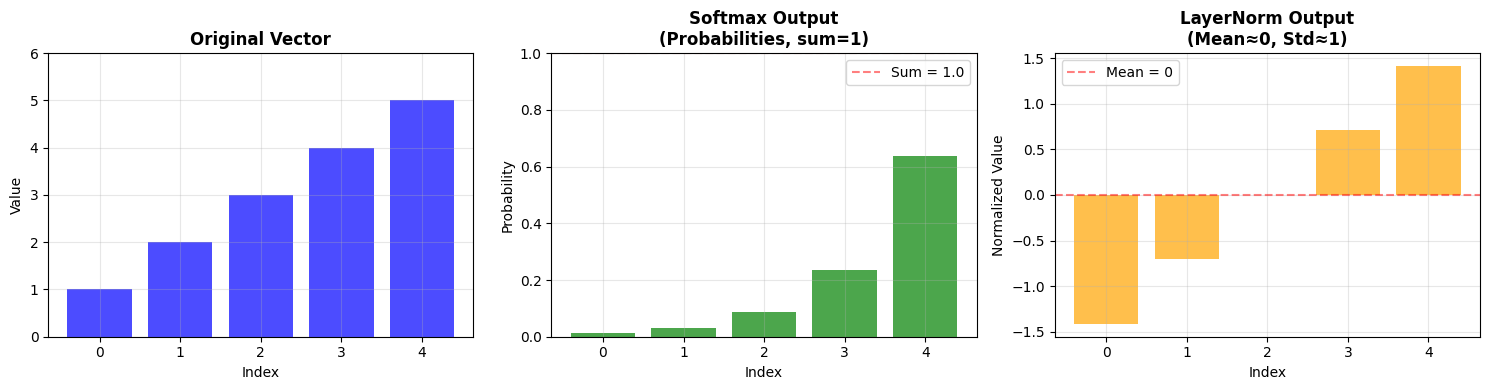

In [4]:
# ============================================================================
# Example 2: Visual Comparison - 1D Case
# ============================================================================

print("=" * 70)
print("Example 2: Visual Comparison (1D Vector)")
print("=" * 70)

# Create a simple 1D vector
x_1d = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
print(f"Original vector: {x_1d}")

# Apply Softmax
softmax_1d = F.softmax(x_1d, dim=0)
print(f"Softmax: {softmax_1d}")
print(f"Softmax sum: {softmax_1d.sum():.4f} (should be 1.0)")

# Apply LayerNorm
layer_norm_1d = nn.LayerNorm(x_1d.shape[0])
layernorm_1d = layer_norm_1d(x_1d)
print(f"LayerNorm: {layernorm_1d}")
print(f"LayerNorm mean: {layernorm_1d.mean():.4f} (should be ~0.0)")
print(f"LayerNorm std: {layernorm_1d.std():.4f} (should be ~1.0)")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original
axes[0].bar(range(len(x_1d)), x_1d.numpy(), color='blue', alpha=0.7)
axes[0].set_title('Original Vector', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')
axes[0].set_ylim(0, 6)
axes[0].grid(True, alpha=0.3)

# Softmax
axes[1].bar(range(len(softmax_1d)), softmax_1d.numpy(), color='green', alpha=0.7)
axes[1].set_title('Softmax Output\n(Probabilities, sum=1)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Probability')
axes[1].set_ylim(0, 1)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=1.0, color='r', linestyle='--', alpha=0.5, label='Sum = 1.0')
axes[1].legend()

# LayerNorm
axes[2].bar(range(len(layernorm_1d)), layernorm_1d.detach().numpy(), color='orange', alpha=0.7)
axes[2].set_title('LayerNorm Output\n(Mean≈0, Std≈1)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Normalized Value')
axes[2].axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Mean = 0')
axes[2].grid(True, alpha=0.3)
axes[2].legend()

plt.tight_layout()
plt.show()

Example 3: Heatmap Comparison (2D Matrix)
Input shape: torch.Size([1, 5, 4])
Input:
tensor([[ 1.6274,  0.8904, -2.6720,  0.5126],
        [-2.0641, -2.9692, -0.2299, -0.3123],
        [ 0.6841,  1.8661,  2.8439,  0.0433],
        [ 0.4903, -1.5854,  0.7239,  0.3394],
        [ 1.5965, -1.4530,  1.9227,  0.1246]])

Softmax (each row sums to 1):
tensor([[0.5494, 0.2629, 0.0075, 0.1802],
        [0.0745, 0.0301, 0.4661, 0.4293],
        [0.0743, 0.2423, 0.6442, 0.0392],
        [0.3078, 0.0386, 0.3888, 0.2647],
        [0.3756, 0.0178, 0.5204, 0.0862]])
Row sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

LayerNorm (each row: mean≈0, std≈1):
tensor([[ 0.9354,  0.4871, -1.6798,  0.2573],
        [-0.5739, -1.3489,  0.9967,  0.9261],
        [-0.6264,  0.4701,  1.3771, -1.2208],
        [ 0.5410, -1.7128,  0.7947,  0.3771],
        [ 0.7832, -1.4941,  1.0268, -0.3159]], grad_fn=<SqueezeBackward1>)
Row means: tensor([-1.4901e-08, -4.4703e-08, -2.9802e-08, -7.4506e-09, -7.4506e-09],
  

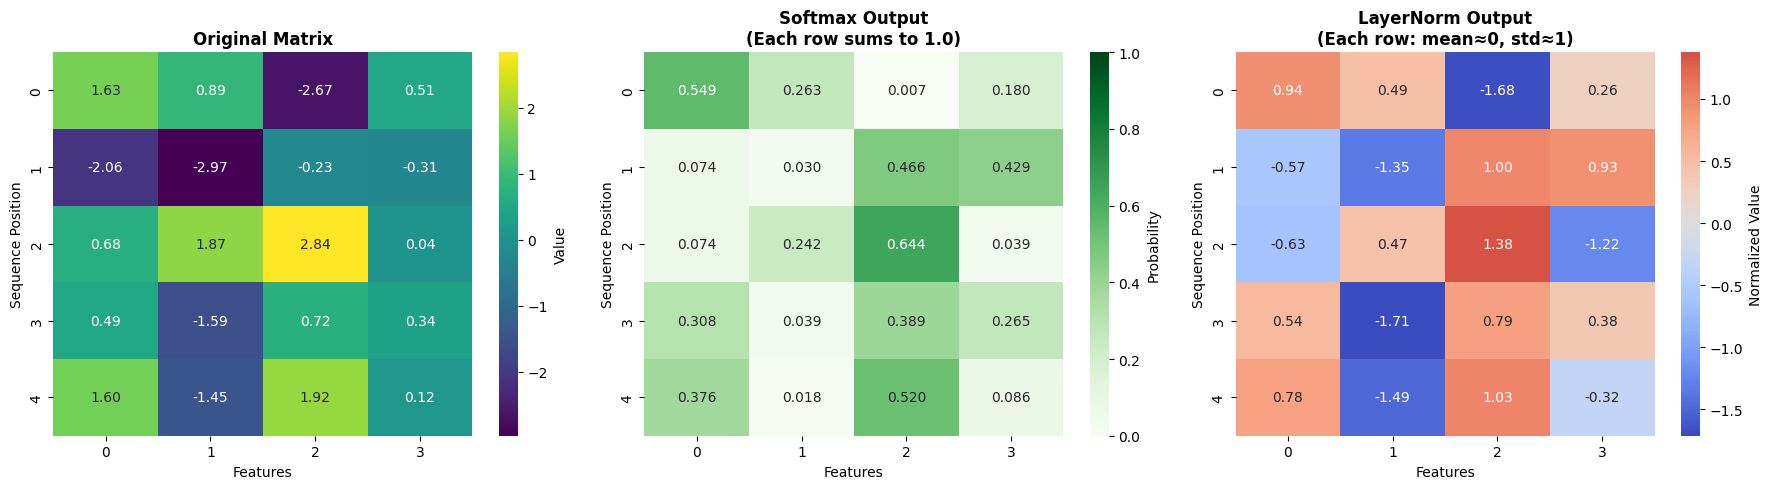

In [6]:
# ============================================================================
# Example 3: Heatmap Visualization - 2D Case
# ============================================================================

print("=" * 70)
print("Example 3: Heatmap Comparison (2D Matrix)")
print("=" * 70)

# Create a 2D matrix (batch=1, seq_len=5, features=4)
x_2d = torch.randn(1, 5, 4) * 2 + 1  # Random values
print(f"Input shape: {x_2d.shape}")
print(f"Input:\n{x_2d.squeeze(0)}\n")

# Apply Softmax (across features dimension)
softmax_2d = F.softmax(x_2d, dim=-1)
print("Softmax (each row sums to 1):")
print(softmax_2d.squeeze(0))
print(f"Row sums: {softmax_2d.sum(dim=-1).squeeze(0)}")

# Apply LayerNorm (across features dimension)
layer_norm_2d = nn.LayerNorm(x_2d.shape[-1])
layernorm_2d = layer_norm_2d(x_2d)
print(f"\nLayerNorm (each row: mean≈0, std≈1):")
print(layernorm_2d.squeeze(0))
print(f"Row means: {layernorm_2d.mean(dim=-1).squeeze(0)}")
print(f"Row stds: {layernorm_2d.std(dim=-1).squeeze(0)}")

# Visualize with heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original
sns.heatmap(x_2d.squeeze(0).numpy(), annot=True, fmt='.2f', cmap='viridis', 
            ax=axes[0], cbar_kws={'label': 'Value'})
axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Sequence Position')

# Softmax
sns.heatmap(softmax_2d.squeeze(0).numpy(), annot=True, fmt='.3f', cmap='Greens',
            ax=axes[1], cbar_kws={'label': 'Probability'}, vmin=0, vmax=1)
axes[1].set_title('Softmax Output\n(Each row sums to 1.0)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Sequence Position')

# LayerNorm
sns.heatmap(layernorm_2d.squeeze(0).detach().numpy(), annot=True, fmt='.2f', cmap='coolwarm',
            ax=axes[2], cbar_kws={'label': 'Normalized Value'}, center=0)
axes[2].set_title('LayerNorm Output\n(Each row: mean≈0, std≈1)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Features')
axes[2].set_ylabel('Sequence Position')

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# Example 4: Distribution Comparison
# ============================================================================

print("=" * 70)
print("Example 4: Distribution Comparison")
print("=" * 70)

# Create random input
x_dist = torch.randn(100, 10) * 5 + 2  # Random values with mean ~2, std ~5
print(f"Input shape: {x_dist.shape}")
print(f"Input - Mean: {x_dist.mean():.4f}, Std: {x_dist.std():.4f}")

# Apply transformations
softmax_dist = F.softmax(x_dist, dim=-1)
layer_norm_dist = nn.LayerNorm(x_dist.shape[-1])(x_dist)

# Flatten for visualization
x_flat = x_dist.flatten().numpy()
softmax_flat = softmax_dist.flatten().numpy()
layernorm_flat = layer_norm_dist.flatten().numpy()

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original distribution
axes[0].hist(x_flat, bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0].axvline(x_flat.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {x_flat.mean():.2f}')
axes[0].set_title('Original Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Softmax distribution
axes[1].hist(softmax_flat, bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1].axvline(softmax_flat.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {softmax_flat.mean():.4f}')
axes[1].set_title('Softmax Distribution\n(All values between 0 and 1)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Probability')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 1)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# LayerNorm distribution
axes[2].hist(layernorm_flat, bins=50, color='orange', alpha=0.7, edgecolor='black')
axes[2].axvline(layernorm_flat.mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {layernorm_flat.mean():.4f}')
axes[2].axvline(layernorm_flat.std(), color='g', linestyle='--', linewidth=2, label=f'Std: {layernorm_flat.std():.4f}')
axes[2].set_title('LayerNorm Distribution\n(Mean≈0, Std≈1)', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Normalized Value')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nStatistics:")
print(f"Softmax - Min: {softmax_flat.min():.4f}, Max: {softmax_flat.max():.4f}, Mean: {softmax_flat.mean():.4f}")
print(f"LayerNorm - Min: {layernorm_flat.min():.2f}, Max: {layernorm_flat.max():.2f}, Mean: {layernorm_flat.mean():.4f}, Std: {layernorm_flat.std():.4f}")

In [ ]:
# ============================================================================
# Example 5: Real-World Use Cases
# ============================================================================

print("=" * 70)
print("Example 5: Real-World Use Cases")
print("=" * 70)

# Use Case 1: Attention Mechanism (Softmax)
print("\n" + "-" * 70)
print("Use Case 1: Attention Scores → Softmax")
print("-" * 70)

# Simulate attention scores (before softmax)
attention_scores = torch.randn(2, 3, 3) * 2  # (batch, seq_len, seq_len)
print(f"Attention scores shape: {attention_scores.shape}")
print(f"Sample scores:\n{attention_scores[0]}")

# Apply softmax to get attention weights (probabilities)
attention_weights = F.softmax(attention_scores, dim=-1)
print(f"\nAttention weights (after softmax):")
print(attention_weights[0])
print(f"Row sums: {attention_weights[0].sum(dim=-1)}")
print("💡 Each row sums to 1.0 - represents probability distribution")

# Use Case 2: Transformer Layer (LayerNorm)
print("\n" + "-" * 70)
print("Use Case 2: Transformer Activations → LayerNorm")
print("-" * 70)

# Simulate activations from a transformer layer
activations = torch.randn(2, 5, 512) * 3 + 1  # (batch, seq_len, d_model)
print(f"Activations shape: {activations.shape}")
print(f"Before LayerNorm - Mean: {activations.mean():.4f}, Std: {activations.std():.4f}")

# Apply LayerNorm
layer_norm_use = nn.LayerNorm(activations.shape[-1])
normalized_activations = layer_norm_use(activations)
print(f"\nAfter LayerNorm - Mean: {normalized_activations.mean():.4f}, Std: {normalized_activations.std():.4f}")
print("💡 Normalized to mean≈0, std≈1 for stable training")

# Visualize the difference
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Attention weights (softmax)
im1 = axes[0].imshow(attention_weights[0].numpy(), cmap='YlOrRd', vmin=0, vmax=1)
axes[0].set_title('Attention Weights (Softmax)\nEach row = probability distribution', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Key Position')
axes[0].set_ylabel('Query Position')
plt.colorbar(im1, ax=axes[0], label='Attention Weight')

# LayerNorm activations
sample_activation = normalized_activations[0, :, :10]  # First 10 features
im2 = axes[1].imshow(sample_activation.numpy(), cmap='coolwarm', center=0)
axes[1].set_title('Normalized Activations (LayerNorm)\nMean≈0, Std≈1 per row', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Feature Index')
axes[1].set_ylabel('Sequence Position')
plt.colorbar(im2, ax=axes[1], label='Normalized Value')

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# Example 6: Side-by-Side Comparison Table
# ============================================================================

print("=" * 70)
print("Example 6: Side-by-Side Comparison")
print("=" * 70)

# Create sample data
sample = torch.tensor([[1.0, 2.0, 3.0, 4.0]], dtype=torch.float32)
print(f"Input: {sample.squeeze(0).tolist()}\n")

# Apply both
softmax_result = F.softmax(sample, dim=-1).squeeze(0)
layernorm_result = nn.LayerNorm(sample.shape[-1])(sample).squeeze(0)

# Create comparison table
comparison_data = {
    'Index': list(range(len(sample.squeeze(0)))),
    'Original': sample.squeeze(0).tolist(),
    'Softmax': softmax_result.tolist(),
    'LayerNorm': layernorm_result.tolist()
}

print("Comparison Table:")
print("-" * 70)
print(f"{'Index':<8} {'Original':<12} {'Softmax':<12} {'LayerNorm':<12}")
print("-" * 70)
for i in range(len(sample.squeeze(0))):
    print(f"{i:<8} {comparison_data['Original'][i]:<12.4f} "
          f"{comparison_data['Softmax'][i]:<12.4f} {comparison_data['LayerNorm'][i]:<12.4f}")
print("-" * 70)
print(f"{'Sum':<8} {sum(comparison_data['Original']):<12.4f} "
      f"{sum(comparison_data['Softmax']):<12.4f} {sum(comparison_data['LayerNorm']):<12.4f}")
print(f"{'Mean':<8} {np.mean(comparison_data['Original']):<12.4f} "
      f"{np.mean(comparison_data['Softmax']):<12.4f} {np.mean(comparison_data['LayerNorm']):<12.4f}")
print(f"{'Std':<8} {np.std(comparison_data['Original']):<12.4f} "
      f"{np.std(comparison_data['Softmax']):<12.4f} {np.std(comparison_data['LayerNorm']):<12.4f}")

# Visual comparison
fig, ax = plt.subplots(figsize=(12, 6))
x_pos = np.arange(len(sample.squeeze(0)))
width = 0.25

bars1 = ax.bar(x_pos - width, comparison_data['Original'], width, 
               label='Original', color='blue', alpha=0.7)
bars2 = ax.bar(x_pos, comparison_data['Softmax'], width, 
               label='Softmax', color='green', alpha=0.7)
bars3 = ax.bar(x_pos + width, comparison_data['LayerNorm'], width, 
               label='LayerNorm', color='orange', alpha=0.7)

ax.set_xlabel('Index', fontsize=11)
ax.set_ylabel('Value', fontsize=11)
ax.set_title('Side-by-Side Comparison: Original vs Softmax vs LayerNorm', 
             fontsize=13, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels([f'x{i}' for i in range(len(sample.squeeze(0)))])
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# Summary: Key Differences
# ============================================================================

print("=" * 70)
print("SUMMARY: Key Differences Between Softmax and LayerNorm")
print("=" * 70)

print("""
┌─────────────────────┬──────────────────────────┬──────────────────────────┐
│ Aspect              │ Softmax                   │ LayerNorm                │
├─────────────────────┼──────────────────────────┼──────────────────────────┤
│ Purpose             │ Convert to probabilities  │ Normalize activations    │
│                     │ (classification,          │ (stabilize training)     │
│                     │  attention weights)       │                          │
├─────────────────────┼──────────────────────────┼──────────────────────────┤
│ Normalization       │ Across specified dim      │ Across features          │
│ Direction           │ (usually last dim)         │ (per sample)             │
├─────────────────────┼──────────────────────────┼──────────────────────────┤
│ Output Range        │ [0, 1]                    │ (-∞, +∞)                 │
│                     │                           │ (but typically [-3, 3])  │
├─────────────────────┼──────────────────────────┼──────────────────────────┤
│ Sum Constraint      │ Sum = 1.0                │ No sum constraint        │
│                     │ (probability dist)       │                          │
├─────────────────────┼──────────────────────────┼──────────────────────────┤
│ Mean Constraint     │ No mean constraint       │ Mean ≈ 0                 │
├─────────────────────┼──────────────────────────┼──────────────────────────┤
│ Std Constraint      │ No std constraint        │ Std ≈ 1                  │
├─────────────────────┼──────────────────────────┼──────────────────────────┤
│ Formula             │ exp(x_i) / Σexp(x_j)     │ γ * (x - μ) / √(σ² + ε) │
│                     │                           │         + β              │
├─────────────────────┼──────────────────────────┼──────────────────────────┤
│ Learnable Params    │ None                      │ γ (scale), β (bias)     │
├─────────────────────┼──────────────────────────┼──────────────────────────┤
│ Common Use Cases    │ • Classification output   │ • Normalize activations │
│                     │ • Attention weights      │ • Before/after layers   │
│                     │ • Probability dist       │ • Stabilize gradients   │
├─────────────────────┼──────────────────────────┼──────────────────────────┤
│ Preserves           │ Relative ordering        │ Relative ordering        │
│                     │ (monotonic)             │ (monotonic)              │
└─────────────────────┴──────────────────────────┴──────────────────────────┘

KEY INSIGHTS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. Softmax creates PROBABILITIES:
   - All values between 0 and 1
   - Sum equals 1.0
   - Used when you need probability distribution
   - Example: "What's the probability of each class?"

2. LayerNorm creates STANDARDIZED values:
   - Mean ≈ 0, Std ≈ 1
   - No sum constraint
   - Used to stabilize training
   - Example: "Normalize these features for better learning"

3. They serve DIFFERENT purposes:
   - Softmax: Output interpretation (probabilities)
   - LayerNorm: Training stability (normalization)

4. Both preserve RELATIVE ORDERING:
   - If x_i > x_j before, same relationship holds after
   - Softmax: Larger values → larger probabilities
   - LayerNorm: Relative differences maintained

VISUAL MEMORY AID:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Softmax:     [2, 4, 1, 3] → [0.1, 0.7, 0.05, 0.15]  (sums to 1.0)
             "What percentage/probability?"

LayerNorm:   [2, 4, 1, 3] → [-0.5, 1.2, -1.3, 0.6]  (mean≈0, std≈1)
             "Standardized for stable training"
""")

In [ ]:
# ============================================================================
# Example 7: Interactive Comparison - See How Values Change
# ============================================================================

print("=" * 70)
print("Example 7: Interactive Comparison")
print("=" * 70)

# Create a range of input values
input_values = torch.linspace(-5, 5, 100)

# Apply both transformations
softmax_values = F.softmax(input_values.unsqueeze(0), dim=-1).squeeze(0)
layer_norm_1d = nn.LayerNorm(input_values.shape[0])
layernorm_values = layer_norm_1d(input_values.unsqueeze(0)).squeeze(0)

# Plot transformation curves
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Row 1: Input vs Output
axes[0, 0].plot(input_values.numpy(), input_values.numpy(), 'b-', linewidth=2, label='Input')
axes[0, 0].set_title('Input Values', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Index')
axes[0, 0].set_ylabel('Value')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

axes[0, 1].plot(input_values.numpy(), softmax_values.numpy(), 'g-', linewidth=2, label='Softmax')
axes[0, 1].set_title('Softmax Output\n(Probabilities, sum=1)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('Probability')
axes[0, 1].set_ylim(0, max(softmax_values.numpy()) * 1.1)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Row 2: LayerNorm
axes[1, 0].plot(input_values.numpy(), layernorm_values.numpy(), 'orange', linewidth=2, label='LayerNorm')
axes[1, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Mean = 0')
axes[1, 0].set_title('LayerNorm Output\n(Mean≈0, Std≈1)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Index')
axes[1, 0].set_ylabel('Normalized Value')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Combined comparison
axes[1, 1].plot(input_values.numpy(), input_values.numpy(), 'b-', linewidth=2, label='Original', alpha=0.5)
axes[1, 1].plot(input_values.numpy(), softmax_values.numpy() * 10, 'g-', linewidth=2, label='Softmax (×10)', alpha=0.7)
axes[1, 1].plot(input_values.numpy(), layernorm_values.numpy(), 'orange', linewidth=2, label='LayerNorm', alpha=0.7)
axes[1, 1].set_title('All Together (Softmax scaled ×10 for visibility)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Value')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\n💡 Notice:")
print("   - Softmax: Peaks at maximum value, all values between 0-1")
print("   - LayerNorm: Centered around 0, maintains relative differences")